In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit import DataStructs
from rdkit import rdBase
from rdkit import RDConfig
from rdkit.Chem import ChemicalFeatures
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Descriptors

from sklearn import model_selection
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [2]:
Test_Size = 0.2

In [34]:
#On Balanced data, EFFICACY >= 0
#Raw data:  https://opendata.ncats.nih.gov/covid19/assay?aid=14

SyntaxError: invalid syntax (<ipython-input-34-2a4bedd3814f>, line 1)

In [3]:
df = pd.read_csv('/home/is/mostatika-a/Balanced-SARS-CoV-2_pAC50.csv', index_col=0)

In [4]:
df

,pAC50,AC50(uM),Active,SMILES
EFFICACY,,,,
105.493143,8.00,0.100000,1,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...
34.268972,7.95,0.112202,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...
40.708548,7.90,0.125893,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...
44.052835,7.90,0.125893,1,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...
34.926175,7.85,0.141254,1,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O
...,...,...,...,...
0.000000,NaN,NaN,0,C[C@H](CO)C/1=C(O)/C(=O)[C@@]2(C)C/C=C(C)/CC/C...
0.000000,NaN,NaN,0,C[C@H](CO)NC1=C(C=C2CCC(=O)NC2=C1)[S+]([O-])(=...
0.000000,NaN,NaN,0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O


In [5]:
df['molecules'] = df.SMILES.apply(Chem.MolFromSmiles)

In [6]:
df

,pAC50,AC50(uM),Active,SMILES,molecules
EFFICACY,,,,,
105.493143,8.00,0.100000,1,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f0676819ee0>
34.268972,7.95,0.112202,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7f0676819e20>
40.708548,7.90,0.125893,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7f0676819ac0>
44.052835,7.90,0.125893,1,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f0676819e80>
34.926175,7.85,0.141254,1,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7f0676819fa0>
...,...,...,...,...,...
0.000000,NaN,NaN,0,C[C@H](CO)C/1=C(O)/C(=O)[C@@]2(C)C/C=C(C)/CC/C...,<rdkit.Chem.rdchem.Mol object at 0x7f06767ffca0>
0.000000,NaN,NaN,0,C[C@H](CO)NC1=C(C=C2CCC(=O)NC2=C1)[S+]([O-])(=...,<rdkit.Chem.rdchem.Mol object at 0x7f06767ffd00>
0.000000,NaN,NaN,0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,<rdkit.Chem.rdchem.Mol object at 0x7f06767ffd60>


In [7]:
df['ECFP4']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024))
df['ECFP6']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024))
df['ECFP8']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=4, nBits=1024))
df['ECFP10']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=5, nBits=1024))
df['ECFP12']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=6, nBits=1024))
df['RDKFP']=df.molecules.apply(lambda m: AllChem.RDKFingerprint(m, fpSize=1024))

In [9]:
df

,pAC50,AC50(uM),Active,SMILES,molecules,ECFP4,ECFP6,ECFP8,ECFP10,ECFP12,RDKFP
EFFICACY,,,,,,,,,,,
105.493143,8.00,0.100000,1,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fa1faf1eb70>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, ..."
34.268972,7.95,0.112202,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7fa1faf1eb20>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
40.708548,7.90,0.125893,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7fa1faf1ecb0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
44.052835,7.90,0.125893,1,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fa1faf1ed00>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
34.926175,7.85,0.141254,1,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7fa1faf1edf0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
0.000000,NaN,NaN,0,C[C@H](CO)C/1=C(O)/C(=O)[C@@]2(C)C/C=C(C)/CC/C...,<rdkit.Chem.rdchem.Mol object at 0x7fa1faec4e40>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, ..."
0.000000,NaN,NaN,0,C[C@H](CO)NC1=C(C=C2CCC(=O)NC2=C1)[S+]([O-])(=...,<rdkit.Chem.rdchem.Mol object at 0x7fa1faec4e90>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ..."
0.000000,NaN,NaN,0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,<rdkit.Chem.rdchem.Mol object at 0x7fa1faec4ee0>,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."


In [8]:
ECFP4 = np.array(list(df['ECFP4']))
ECFP6 = np.array(list(df['ECFP6']))
ECFP8 = np.array(list(df['ECFP8']))
ECFP10 = np.array(list(df['ECFP10']))
ECFP12 = np.array(list(df['ECFP12']))
RDKFP = np.array(list(df['RDKFP']))

Active = df['Active'].values

In [11]:
#Test-ECFP4
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP4, Active, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 617 140
1: 595 163


In [17]:
#For Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
train_ac= model.score(X_train,y_train)
test_ac= model.score(X_test,y_test)
print("Train_accuracy_score:",round(train_ac,3))
print("Test_accuracy_score:",round(test_ac,3))

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predicted = model.predict(X_test)
f1 = f1_score(y_test,y_predicted)
print("F1 Score for logistic regression:", round(f1,3))
pres = precision_score(y_test,y_predicted)
print("Precision_Score for logistic regression:", round(pres,3))
res = recall_score(y_test,y_predicted)
print("Recall_Score for logistic regression:", round(res,3))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


Train_accuracy_score: 0.997
Test_accuracy_score: 0.762
F1 Score for logistic regression: 0.743
Precision_Score for logistic regression: 0.743
Recall_Score for logistic regression: 0.743


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       163
           1       0.74      0.74      0.74       140

    accuracy                           0.76       303
   macro avg       0.76      0.76      0.76       303
weighted avg       0.76      0.76      0.76       303



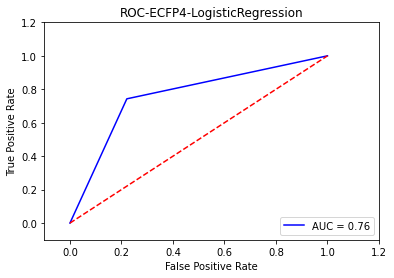

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP4-LogisticRegression')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.jpg", dpi = 300)
plt.show()

In [39]:
fpr

array([0.       , 0.2208589, 1.       ])

In [40]:
tpr

array([0.        , 0.74285714, 1.        ])

In [41]:
thresholds

array([2, 1, 0])

Average Precision Score: 0.80


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.80')

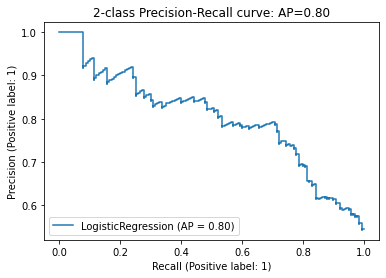

In [20]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

y_score= model.decision_function(X_test)
average_precision = average_precision_score(y_test,y_score)
print('Average Precision Score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


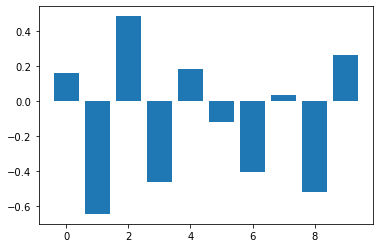

In [21]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [22]:
#For Random Forest Classification
rf = RandomForestClassifier(max_features='auto')
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
rf_lab = rf.predict(X_train)
rf_pre = rf.predict(X_test)
print("Train_accuracy_score:",accuracy_score(y_train,rf_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rf_pre))

R2Score = r2_score(y_train,rf_lab)
print("R2Score: ",R2Score) 
R2Score1 = r2_score(y_test,rf_pre)
print("R2Score: ",R2Score1) 

F1_Score_train = f1_score(y_train,rf_lab, average=None)
print("Train_F1_Score:", F1_Score_train)
F1_Score_test=f1_score(y_test,rf_pre, average=None)
print("Test_F1_Score:", F1_Score_test)

print(classification_report(y_test, rf_pre))
print(classification_report(y_train, rf_lab))

Train_accuracy_score: 0.9983498349834984
Test_accuracy_score: 0.801980198019802
R2Score:  0.9933967506783041
R2Score:  0.20333041191936907
Train_F1_Score: [0.9983165  0.99838188]
Test_F1_Score: [0.81012658 0.79310345]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       163
           1       0.77      0.82      0.79       140

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1212
   macro avg       1.00      1.00      1.00      1212
weighted avg       1.00      1.00      1.00      1212



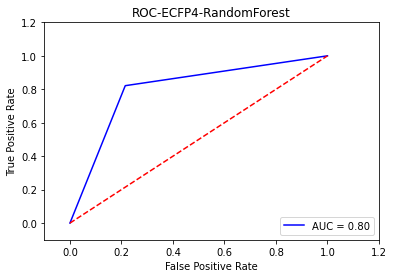

In [26]:
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP4-RandomForest')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("ROC.jpg", dpi = 300)
plt.show()

In [45]:
fpr

array([0.       , 0.2208589, 1.       ])

In [46]:
tpr

array([0.        , 0.74285714, 1.        ])

In [44]:
thresholds

array([2, 1, 0])

Text(0.5, 1.0, 'Precision-Recall curve')

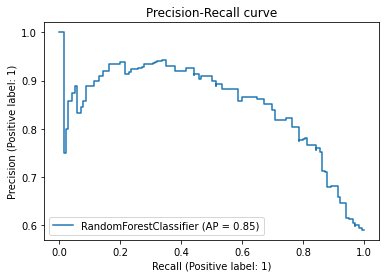

In [27]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

Feature: 0, Score: 0.06519
Feature: 1, Score: 0.10594
Feature: 2, Score: 0.16670
Feature: 3, Score: 0.19340
Feature: 4, Score: 0.07955
Feature: 5, Score: 0.11565
Feature: 6, Score: 0.09600
Feature: 7, Score: 0.04912
Feature: 8, Score: 0.08710
Feature: 9, Score: 0.04135


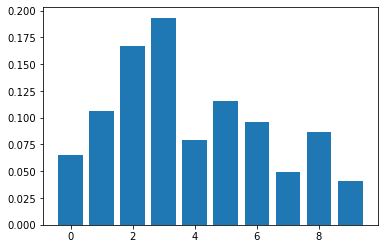

In [28]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
rf = RandomForestClassifier()
# fit the model
rf.fit(X, y)
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [15]:
#Test-ECFP6
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP6, Active, test_size = Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 594 163
1: 618 140


In [16]:
rf = RandomForestClassifier(max_features='auto')
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
rf_lab = rf.predict(X_train)
rf_pre = rf.predict(X_test)
print("Train_accuracy_score:",accuracy_score(y_train,rf_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rf_pre))

Train_accuracy_score: 0.9983498349834984
Test_accuracy_score: 0.8415841584158416


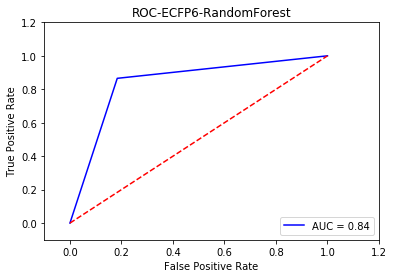

In [18]:
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP6-RandomForest')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("ROC.jpg", dpi = 300)
plt.show()

In [19]:
#Test-ECFP8
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP8, Active, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 606 151
1: 606 152


In [20]:
rf = RandomForestClassifier(max_features='auto')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
rf_lab = rf.predict(X_train)
rf_pre = rf.predict(X_test)
print("Train_accuracy_score:",accuracy_score(y_train,rf_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rf_pre))

Train_accuracy_score: 0.9983498349834984
Test_accuracy_score: 0.7986798679867987


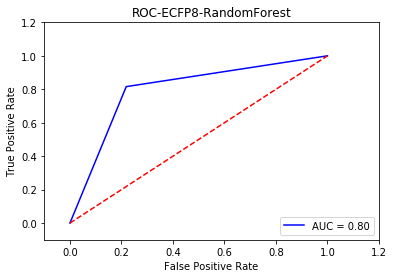

In [22]:
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP8-RandomForest')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("ROC.jpg", dpi = 300)
plt.show()

In [23]:
#Test-ECFP10
#Seems best?
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP10, Active, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 594 163
1: 618 140


In [24]:
rf = RandomForestClassifier(max_features='auto')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf_lab = rf.predict(X_train)
rf_pre = rf.predict(X_test)
print("Train_accuracy_score:",accuracy_score(y_train,rf_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rf_pre))

Train_accuracy_score: 0.9975247524752475
Test_accuracy_score: 0.8052805280528053


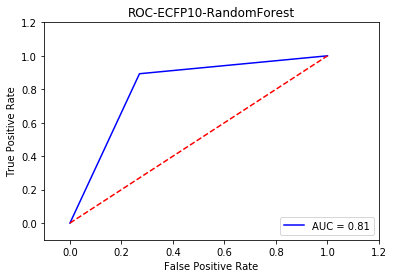

In [26]:
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP10-RandomForest')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("ROC.jpg", dpi = 300)
plt.show()

In [27]:
#Test-ECFP12
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP12, Active, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 606 151
1: 606 152


In [28]:
rf = RandomForestClassifier(max_features='auto')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rf_lab = rf.predict(X_train)
rf_pre = rf.predict(X_test)
print("Train_accuracy_score:",accuracy_score(y_train,rf_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rf_pre))

Train_accuracy_score: 0.9991749174917491
Test_accuracy_score: 0.8250825082508251


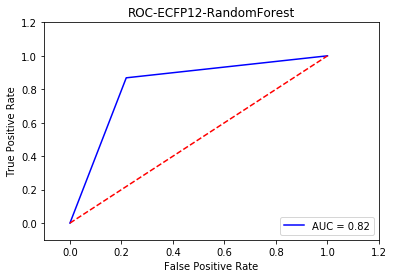

In [30]:
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP12-RandomForest')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("ROC.jpg", dpi = 300)
plt.show()

In [31]:
#Test-RDKFP
X_train, X_test, y_train, y_test = model_selection.train_test_split(RDKFP, Active, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 602 155
1: 610 148


In [32]:
rf = RandomForestClassifier(max_features='auto')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rf_lab = rf.predict(X_train)
rf_pre = rf.predict(X_test)
print("Train_accuracy_score:",accuracy_score(y_train,rf_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rf_pre))

Train_accuracy_score: 0.995049504950495
Test_accuracy_score: 0.7821782178217822


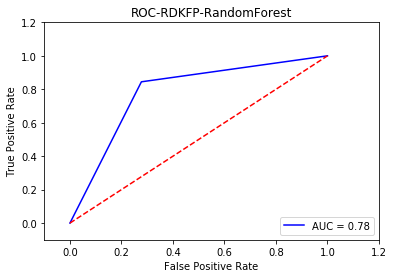

In [34]:
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC-RDKFP-RandomForest')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("ROC.jpg", dpi = 300)
plt.show()

In [35]:
#####################################################################################################################

In [36]:
#On Active data, EFFICACY >= 0, 3-class
#Raw data:  https://opendata.ncats.nih.gov/covid19/assay?aid=14

In [37]:
df = pd.read_csv('/home/is/zi-yang/Cov/Active_3Class-SARS-CoV-2_pAC50.csv', index_col=0)

In [38]:
df

,pAC50,AC50(uM),pClass,SMILES
EFFICACY,,,,
105.493143,8.00,0.100000,2,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...
34.268972,7.95,0.112202,2,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...
40.708548,7.90,0.125893,2,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...
44.052835,7.90,0.125893,2,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...
34.926175,7.85,0.141254,2,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O
...,...,...,...,...
96.660428,5.60,25.118864,0,CCN(CC)C(=S)SSC(=S)N(CC)CC
113.434865,5.60,25.118864,0,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C3=CC=C(Cl)...
103.780671,5.55,28.183829,0,CN(C)S(=O)(=O)c1cc2N(CC(C)N(C)C)c3ccccc3Sc2cc1


In [39]:
df['molecules'] = df.SMILES.apply(Chem.MolFromSmiles)
#Get feature set
#df['HBA']=df.molecules.apply(lambda m: rdescriptors.CalcNumLipinskiHBA(m))
#df['HBD']=df.molecules.apply(lambda m: rdescriptors.CalcNumLipinskiHBD(m))
#df['logP']=df.molecules.apply(lambda m: Descriptors.MolLogP(m))
#df['TPSA']=df.molecules.apply(lambda m: Descriptors.TPSA(m))
#df['num_rotatable_bonds']=df.molecules.apply(lambda m: Descriptors.NumRotatableBonds(m))
#df['num_heavy_atoms']=df.molecules.apply(lambda m: m.GetNumHeavyAtoms())
#df['MW']=df.molecules.apply(lambda m: Descriptors.MolWt(m))

In [40]:
df['ECFP4']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024))
df['ECFP6']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024))
df['ECFP8']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=4, nBits=1024))
df['ECFP10']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=5, nBits=1024))
df['ECFP12']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=6, nBits=1024))
df['RDKFP']=df.molecules.apply(lambda m: AllChem.RDKFingerprint(m, fpSize=1024))

In [41]:
df

,pAC50,AC50(uM),pClass,SMILES,molecules,ECFP4,ECFP6,ECFP8,ECFP10,ECFP12,RDKFP
EFFICACY,,,,,,,,,,,
105.493143,8.00,0.100000,2,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fa1fae19350>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, ..."
34.268972,7.95,0.112202,2,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7fa1f5134cb0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
40.708548,7.90,0.125893,2,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7fa1f5134030>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
44.052835,7.90,0.125893,2,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fa1fa9d43f0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
34.926175,7.85,0.141254,2,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7fa1fa9d4350>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
96.660428,5.60,25.118864,0,CCN(CC)C(=S)SSC(=S)N(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7fa1fabf1440>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
113.434865,5.60,25.118864,0,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C3=CC=C(Cl)...,<rdkit.Chem.rdchem.Mol object at 0x7fa1fabf13f0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, ..."
103.780671,5.55,28.183829,0,CN(C)S(=O)(=O)c1cc2N(CC(C)N(C)C)c3ccccc3Sc2cc1,<rdkit.Chem.rdchem.Mol object at 0x7fa1fabf13a0>,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."


In [42]:
Test_Size = 0.4

In [43]:
ECFP10 = np.array(list(df['ECFP10']))
ECFP4 = np.array(list(df['ECFP4']))
pClass = df['pClass'].values

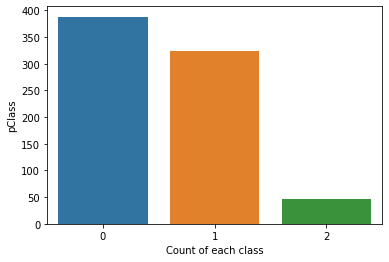

In [44]:
sns.countplot(data = df, x='pClass', orient='v')
plt.ylabel('pClass')
plt.xlabel('Count of each class')
plt.show()

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP10, pClass, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))
print('2:',list(y_train).count(2),list(y_test).count(2))

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

0: 236 152
1: 199 125
2: 19 27


In [46]:
#RandomForest
rfc1 = RandomForestClassifier(oob_score=True)
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rfc1_lab = rfc1.predict(X_train)
rfc1_pre = rfc1.predict(X_test)
print("OOB score:",rfc1.oob_score_)
print("Train_accuracy_score:",accuracy_score(y_train,rfc1_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rfc1_pre))

OOB score: 0.5594713656387665
Train_accuracy_score: 0.9823788546255506
Test_accuracy_score: 0.4605263157894737


Text(0.5, 1.0, 'ROC-Active_3Class_RandomForest-ECFP10')

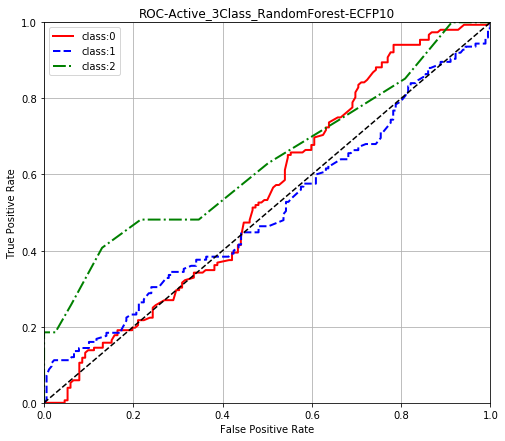

In [48]:
lable_names = ["0","1","2"]
colors = ["r","b","g"]
linestyles =["-", "--", "-."]
y_test_lb = label_binarize(y_test,classes=[0,1,2])
pre_score = rfc1.predict_proba(X_test)
fig  = plt.figure(figsize=(8,7))
for ii, color in zip(range(pre_score.shape[1]), colors):
    ## ROC
    fpr_ii, tpr_ii, _ = roc_curve(y_test_lb[:,ii], pre_score[:,ii])
    plt.plot(fpr_ii, tpr_ii,color = color,linewidth = 2,
             linestyle = linestyles[ii],
             label = "class:"+lable_names[ii])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.title("ROC-Active_3Class_RandomForest-ECFP10")

In [49]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP4, pClass, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))
print('2:',list(y_train).count(2),list(y_test).count(2))

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

0: 234 154
1: 190 134
2: 30 16


In [50]:
#RandomForest
rfc1 = RandomForestClassifier(oob_score=True)
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
rfc1_lab = rfc1.predict(X_train)
rfc1_pre = rfc1.predict(X_test)
print("OOB score:",rfc1.oob_score_)
print("Train_accuracy_score:",accuracy_score(y_train,rfc1_lab))
print("Test_accuracy_score:",accuracy_score(y_test,rfc1_pre))

OOB score: 0.5308370044052864
Train_accuracy_score: 0.9713656387665198
Test_accuracy_score: 0.5131578947368421


Text(0.5, 1.0, 'ROC-Active_3Class_RandomForest-ECFP4')

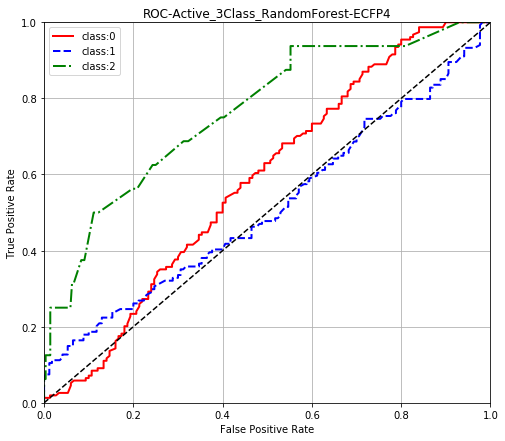

In [52]:
lable_names = ["0","1","2"]
colors = ["r","b","g"]
linestyles =["-", "--", "-."]
y_test_lb = label_binarize(y_test,classes=[0,1,2])
pre_score = rfc1.predict_proba(X_test)
fig  = plt.figure(figsize=(8,7))
for ii, color in zip(range(pre_score.shape[1]), colors):
    ## ROC
    fpr_ii, tpr_ii, _ = roc_curve(y_test_lb[:,ii], pre_score[:,ii])
    plt.plot(fpr_ii, tpr_ii,color = color,linewidth = 2,
             linestyle = linestyles[ii],
             label = "class:"+lable_names[ii])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.title("ROC-Active_3Class_RandomForest-ECFP4")

In [53]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP10, pClass, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))
print('2:',list(y_train).count(2),list(y_test).count(2))

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

0: 234 154
1: 195 129
2: 25 21


In [54]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
lr_lab = lr.predict(X_train)
lr_pre = lr.predict(X_test)
print("Train_accuracy_score:",accuracy_score(y_train,lr_lab))
print("Test_accuracy_score:",accuracy_score(y_test,lr_pre))

Train_accuracy_score: 0.9779735682819384
Test_accuracy_score: 0.45394736842105265


Text(0.5, 1.0, 'ROC-Active_3Class_LogisticRegression-ECFP10')

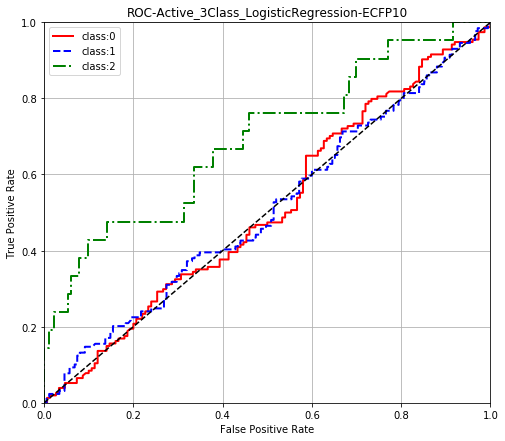

In [56]:
lable_names = ["0","1","2"]
colors = ["r","b","g"]
linestyles =["-", "--", "-."]
y_test_lb = label_binarize(y_test,classes=[0,1,2])
pre_score = lr.predict_proba(X_test)
fig  = plt.figure(figsize=(8,7))
for ii, color in zip(range(pre_score.shape[1]), colors):
    ## ROC
    fpr_ii, tpr_ii, _ = roc_curve(y_test_lb[:,ii], pre_score[:,ii])
    plt.plot(fpr_ii, tpr_ii,color = color,linewidth = 2,
             linestyle = linestyles[ii],
             label = "class:"+lable_names[ii])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.title("ROC-Active_3Class_LogisticRegression-ECFP10")

In [57]:
Test_Size = 0.2

In [58]:
pAC50 = df['pAC50'].values

In [59]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP4, pAC50, test_size= Test_Size)

Train_MSE: 0.002488730489725681
Test_MSE: 8.33509669985308e+23


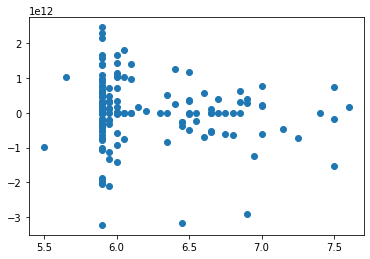

In [60]:
#LinearRegression
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

lr_lab = lr.predict(X_train)
lr_pre = lr.predict(X_test)

print("Train_MSE:",mean_squared_error(y_train,lr_lab))
print("Test_MSE:",mean_squared_error(y_test,lr_pre))
plt.plot(y_test,lr_pre,'o')

Train_MSE: 0.05587330000511705
Test_MSE: 0.16716111018053495


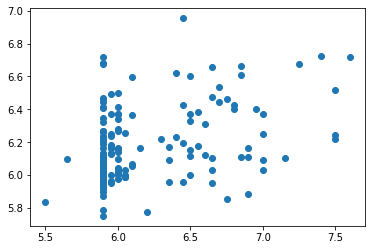

In [61]:
#BayesianRidge
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)

br_lab = br.predict(X_train)
br_pre = br.predict(X_test)

print("Train_MSE:",mean_squared_error(y_train,br_lab))
print("Test_MSE:",mean_squared_error(y_test,br_pre))
plt.plot(y_test,br_pre,'o')

Train_MSE: 0.09274494550565457
Test_MSE: 0.40882324645467016


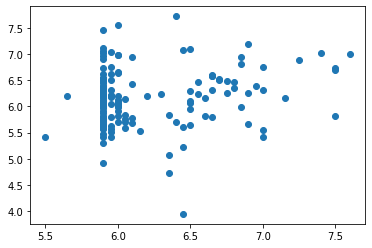

In [62]:
#SGDRegressor
sgd = linear_model.SGDRegressor()
sgd.fit(X_train, y_train)

sgd_lab = sgd.predict(X_train)
sgd_pre = sgd.predict(X_test)

print("Train_MSE:",mean_squared_error(y_train,sgd_lab))
print("Test_MSE:",mean_squared_error(y_test,sgd_pre))
plt.plot(y_test,sgd_pre,'o')

Train_MSE: 0.002466996699669965
Test_MSE: 0.6561986603630202


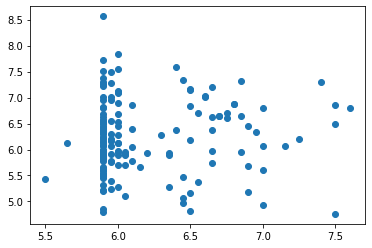

In [63]:
#TheilSenRegressor
sr = linear_model.TheilSenRegressor()
sr.fit(X_train, y_train)

sr_lab = sr.predict(X_train)
sr_pre = sr.predict(X_test)

print("Train_MSE:",mean_squared_error(y_train,sr_lab))
print("Test_MSE:",mean_squared_error(y_test,sr_pre))
plt.plot(y_test,sr_pre,'o')